In [407]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [408]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [590]:
#Read in the csv file and convert to a Pandas dataframe
df2017=pd.read_csv('/content/drive/MyDrive/case2/2017.csv')
df2016=pd.read_csv('/content/drive/MyDrive/case2/2016.csv')
df2015=pd.read_csv('/content/drive/MyDrive/case2/2015.csv')

**Questions require these dataset versions shown below. apply EDA to each dataset .**

#2017


### Viewing the dataframe


In [591]:
df2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [592]:
df2017.shape

(155, 12)

### 1. Data Profiling:


In [593]:
# display name of each column
df2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [594]:
# used info method to offer a quick and informative overview of the dataset
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [595]:
# overview
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [596]:
# used describe method to display statistical analysis
df2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


### Data Quality Checks


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [597]:
# The dataset is reliable because the collaborators Sustainable Development Solutions Network(owner) and 1 collaborator(admin)

#### 2. Timeliness:


**Some of the question require a 2017 version of the dataset and some do not specify the year ,I have to pick the last year available but I observed that the data card on the Kaggle context section didn't mention the 2018 or  2019 version  and there's an Inspiration section contained problem questions for this reason I have taken into account until the 2017 version**


#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [598]:
df2017.dtypes

,0
Country,object
Happiness.Rank,int64
Happiness.Score,float64
Whisker.high,float64
Whisker.low,float64
Economy..GDP.per.Capita.,float64
Family,float64
Health..Life.Expectancy.,float64
Freedom,float64
Generosity,float64


In [599]:
df2016.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Lower Confidence Interval,float64
Upper Confidence Interval,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64


In [600]:
df2015.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


**since datasets have different versions. need to check the datatype of the 2017 dataset should be the same and it's the same in 2015 and 2016 but contain addtional columns thats fine because the change year so its consistence**

#### 4. Relevance:


In [601]:
# drop Dystopia Residual because it's based on imaginary country
df2017.drop('Dystopia.Residual',axis=1,inplace=True)

**All columns relevance**

#### 5. Uniqueness:


In [602]:
# shouldnt be there duplicated rows we have to check that
df2017.duplicated().sum()

0

#### 6. Completeness:


In [603]:
#Display number missing values per column
df2017.isnull().sum()

,0
Country,0
Happiness.Rank,0
Happiness.Score,0
Whisker.high,0
Whisker.low,0
Economy..GDP.per.Capita.,0
Family,0
Health..Life.Expectancy.,0
Freedom,0
Generosity,0


#### 7.Check Accuracy:

In [604]:
df2017.dtypes

,0
Country,object
Happiness.Rank,int64
Happiness.Score,float64
Whisker.high,float64
Whisker.low,float64
Economy..GDP.per.Capita.,float64
Family,float64
Health..Life.Expectancy.,float64
Freedom,float64
Generosity,float64


**as shown above data types for each column in the dataset is Valid.**

### 1.  Univariate Graphical Analysis:

In [605]:
df2017.head(4)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007


<Axes: ylabel='Economy..GDP.per.Capita.'>

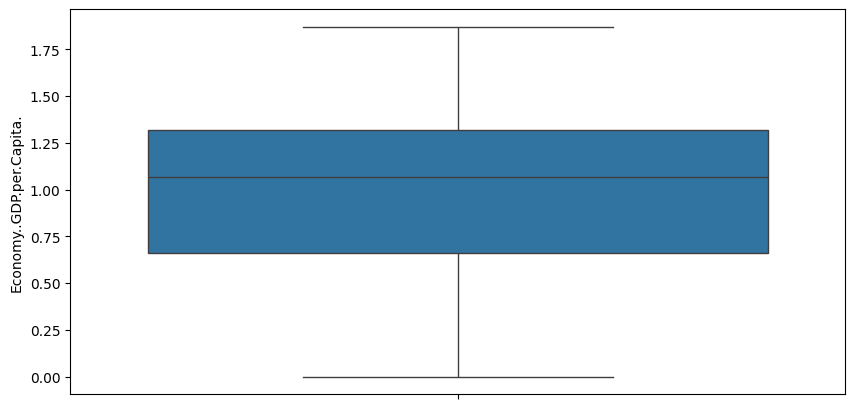

In [606]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Economy..GDP.per.Capita.",
    #hue="Category"
)

box plot above shows no outlier in Economy..GDP.per.Capita. but there's positive skewness

<Axes: ylabel='Family'>

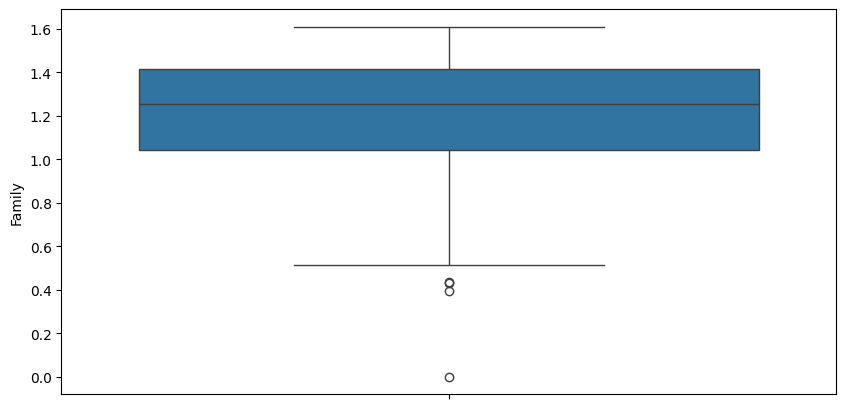

In [607]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Family",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

<Axes: ylabel='Health..Life.Expectancy.'>

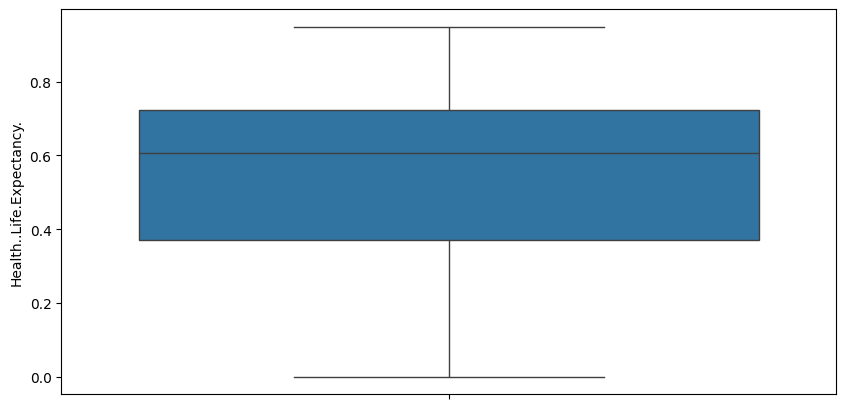

In [608]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Health..Life.Expectancy.",
    #hue="Category"
)

box plot above shows no outlier in Health..Life.Expectancy. but there's positive skewness

<Axes: ylabel='Freedom'>

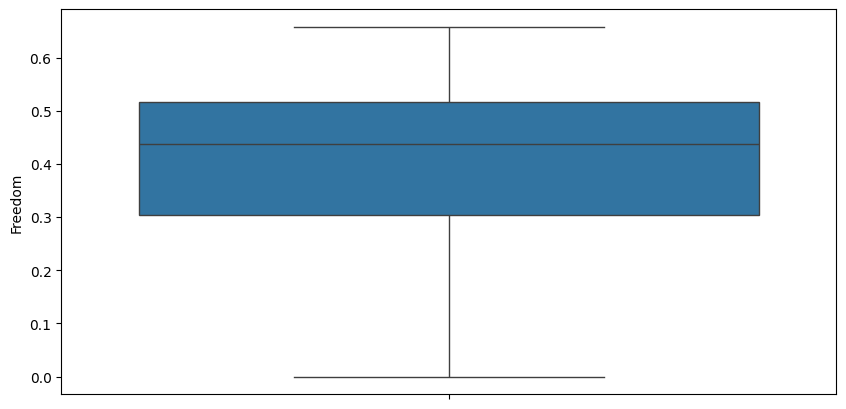

In [609]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Freedom",
    #hue="Category"
)

box plot above shows no outlier in Freedom but there's positive skewed

<Axes: ylabel='Generosity'>

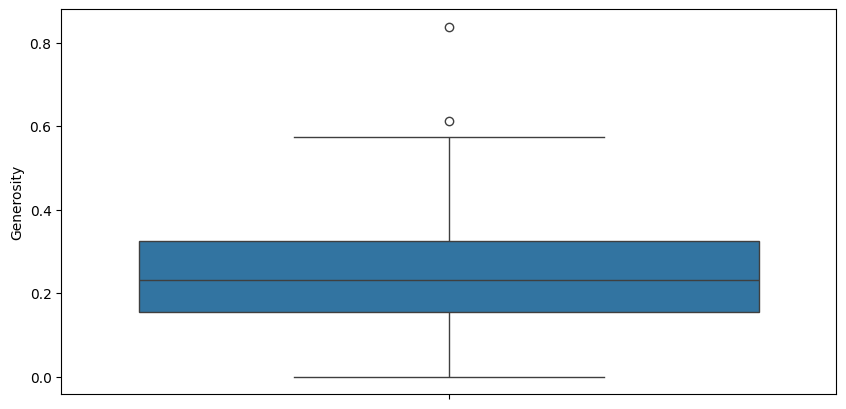

In [610]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Generosity",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

<Axes: ylabel='Trust..Government.Corruption.'>

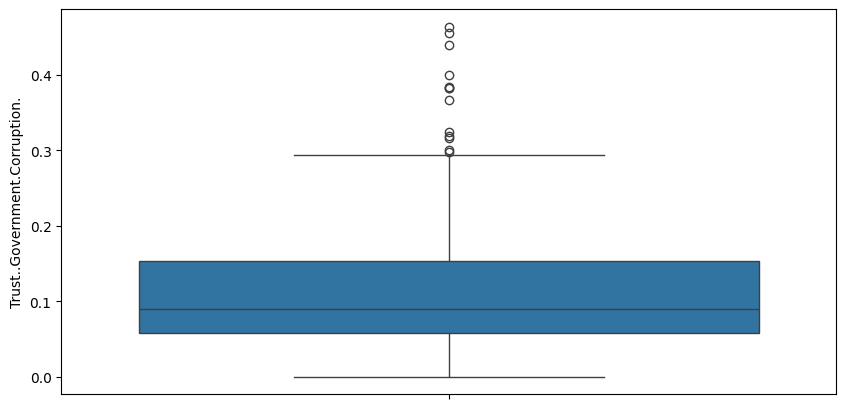

In [611]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2017,
    y="Trust..Government.Corruption.",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

#2016


### Viewing the dataframe


In [612]:
df2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [613]:
df2016.shape

(157, 13)

## 1. Data Profiling:


In [614]:
# display name of each column
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [615]:
# used info method to offer a quick and informative overview of the dataset
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [616]:
# overview
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [617]:
# used describe method to display statistical analysis
df2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


### Data Quality Checks


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [618]:
# The dataset is reliable because the collaborators Sustainable Development Solutions Network(owner) and 1 collaborator(admin)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [619]:
# question requires datasets of version 2016

#### 3. Consistency:



In [620]:
df2016.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Lower Confidence Interval,float64
Upper Confidence Interval,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64


In [621]:
dff2017=pd.read_csv('/content/drive/MyDrive/case2/2017.csv')
dff2017.dtypes

,0
Country,object
Happiness.Rank,int64
Happiness.Score,float64
Whisker.high,float64
Whisker.low,float64
Economy..GDP.per.Capita.,float64
Family,float64
Health..Life.Expectancy.,float64
Freedom,float64
Generosity,float64


In [622]:
dff2015=pd.read_csv('/content/drive/MyDrive/case2/2015.csv')
dff2015.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


**since datasets have different versions. need to check the datatype of the 2016 dataset should be the same in the 2017 and 2015 versions and its same so its consistance**

#### 4. Relevance:


In [623]:
# drop Dystopia Residual because it's based on imaginary country
df2016.drop('Dystopia Residual',axis=1,inplace=True)

In [624]:
df2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [625]:
# use the duplicated method to see if they're duplicated records because shouldn't be there duplicated records on this problem
df2016.duplicated().sum()

0

#### 6. Completeness:


In [626]:
#Display number missing values per column
df2016.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Lower Confidence Interval,0
Upper Confidence Interval,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0


#### 7.Check Accuracy:

In [627]:
df2016.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Lower Confidence Interval,float64
Upper Confidence Interval,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64


### 1.  Univariate Graphical Analysis:

In [628]:
df2016.head(4)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895


<Axes: ylabel='Economy (GDP per Capita)'>

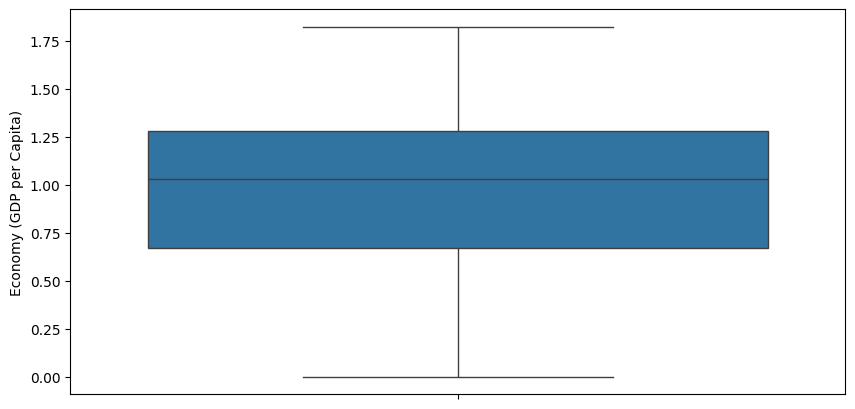

In [629]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Economy (GDP per Capita)",
    #hue="Category"
)

box plot above shows no outlier in Economy (GDP per Capita) but there's positive skewness

<Axes: ylabel='Family'>

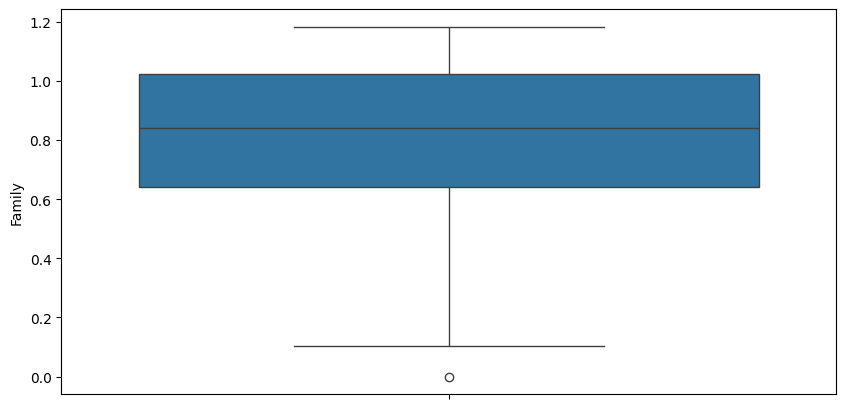

In [630]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Family",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

<Axes: ylabel='Health (Life Expectancy)'>

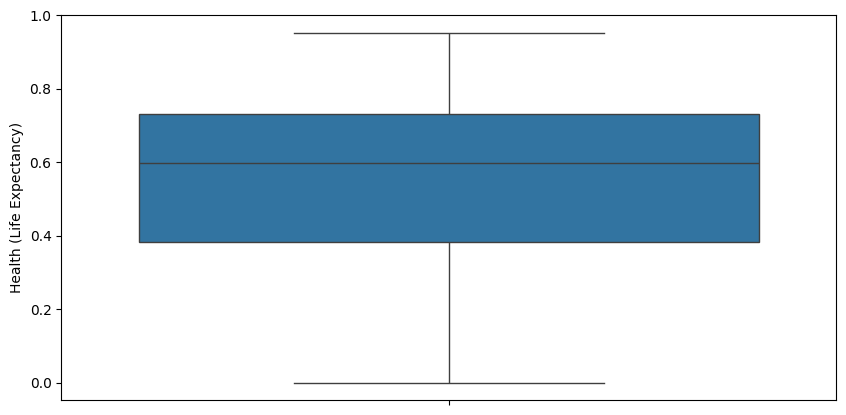

In [631]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Health (Life Expectancy)",
    #hue="Category"
)


box plot above shows no outlier in Health (Life Expectancy) but there's positive skewness

<Axes: ylabel='Freedom'>

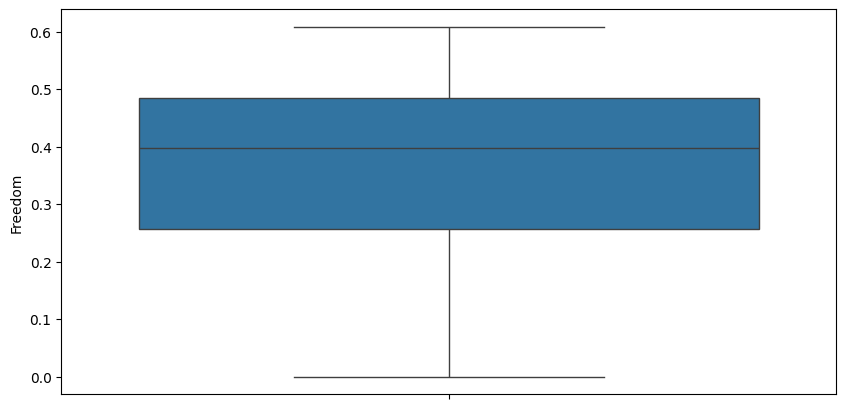

In [632]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Freedom",
    #hue="Category"
)

box plot above shows no outlier in Freedom but there's positive skewness

<Axes: ylabel='Trust (Government Corruption)'>

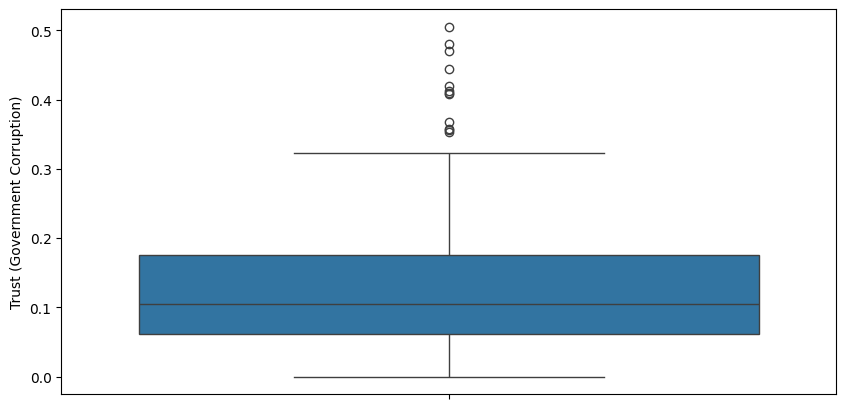

In [633]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Trust (Government Corruption)",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

<Axes: ylabel='Generosity'>

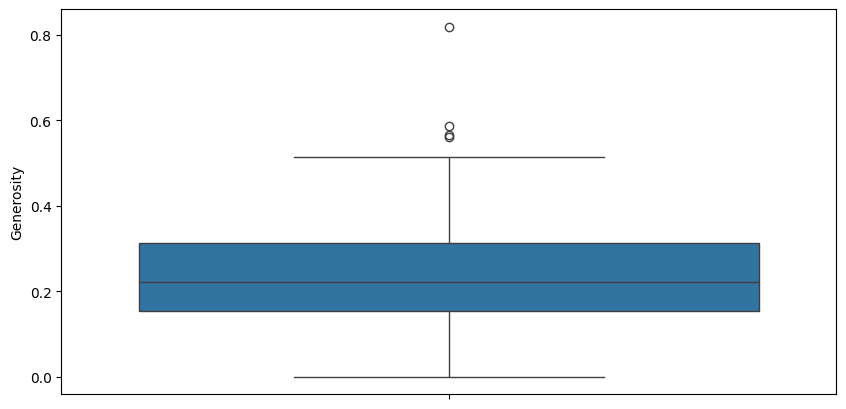

In [634]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2016,
    y="Generosity",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

#2015

### Viewing the dataframe


In [635]:
df2015.shape

(158, 12)

In [636]:
df2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## 1. Data Profiling:


In [637]:
# display name of each column
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [638]:
# used info method to offer a quick and informative overview of the dataset
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [639]:
# overview
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [640]:
# used describe method to display statistical analysis
df2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Data Quality Checks


#### 1. Reliability:


In [641]:
# The dataset is reliable because the collaborators Sustainable Development Solutions Network(owner) and 1 collaborator(admin)

#### 2. Timeliness:


In [642]:
# question requires datasets of version 2015

#### 3. Consistency:



In [643]:
df2015.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


In [644]:
dff2017=pd.read_csv('/content/drive/MyDrive/case2/2017.csv')
dff2017.dtypes

,0
Country,object
Happiness.Rank,int64
Happiness.Score,float64
Whisker.high,float64
Whisker.low,float64
Economy..GDP.per.Capita.,float64
Family,float64
Health..Life.Expectancy.,float64
Freedom,float64
Generosity,float64


In [645]:
dff2016=pd.read_csv('/content/drive/MyDrive/case2/2016.csv')
dff2016.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Lower Confidence Interval,float64
Upper Confidence Interval,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64


**since datasets have different versions. need to check the datatype of the 2015 dataset should be the same in the 2017 and 2016 versions but 2017 doesn't contain a region column also 2017 and 2016 versions dont have Standard Error column . I think it's normal each version it's updated has equal, fewer, or more columns.but at least column found in these versions same datatype**

#### 4. Relevance:



In [646]:
# drop Dystopia Residual because it's based on imaginary country
df2015.drop('Dystopia Residual',axis=1,inplace=True)

In [647]:
df2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


#### 5. Uniqueness:


In [648]:
# use the duplicated method to see if they're duplicated records because shouldn't be there duplicated records on this problem
df2015.duplicated().sum()

0

#### 6. Completeness:


In [649]:
#Display number missing values per column
df2015.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


#### 7.Check Accuracy:

In [650]:
df2015.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


**as shown above data types for each column in the dataset is Valid.**

### 1.  Univariate Graphical Analysis:

In [651]:
df2015.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699


<Axes: ylabel='Economy (GDP per Capita)'>

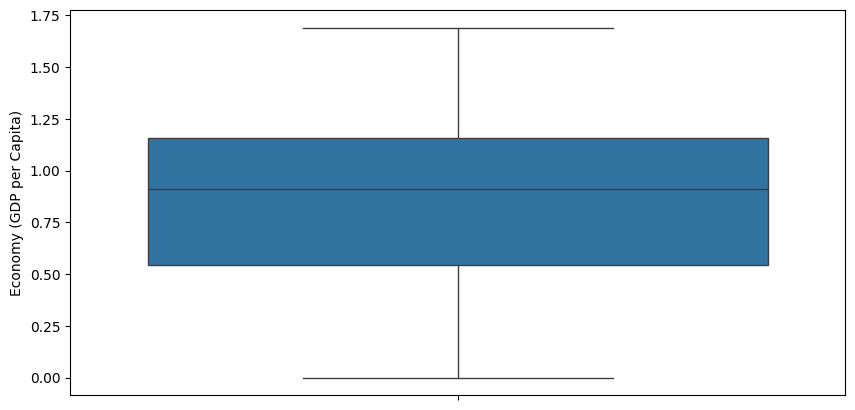

In [652]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Economy (GDP per Capita)",
    #hue="Category"
)

box plot above shows no outlier in Economy (GDP per Capita) but there's a positive skewness

<Axes: ylabel='Family'>

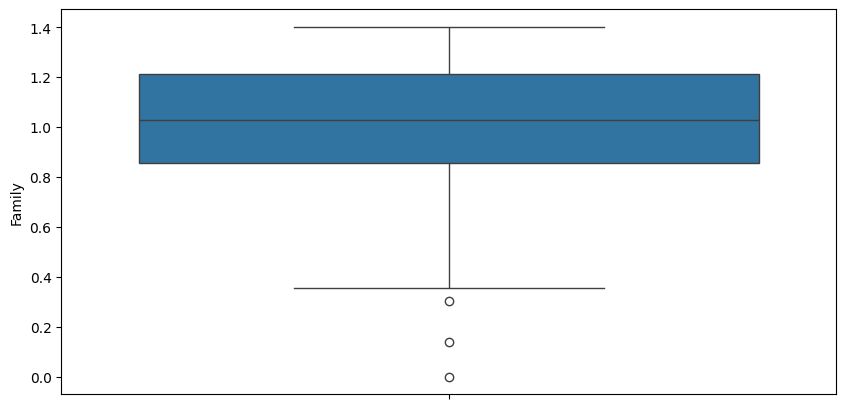

In [653]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Family",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column

<Axes: ylabel='Health (Life Expectancy)'>

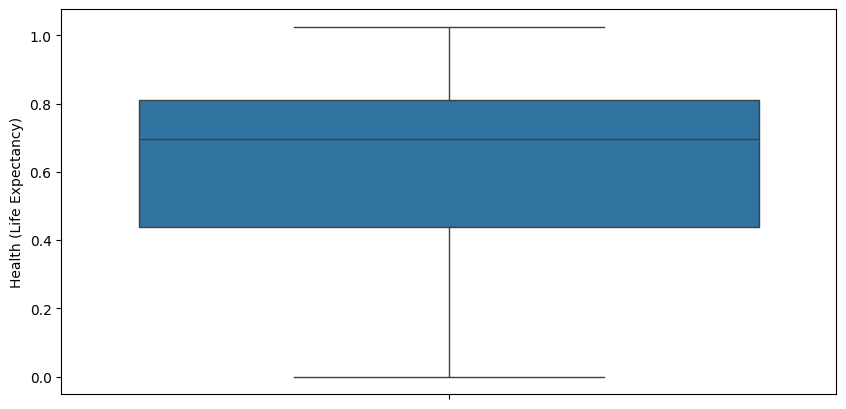

In [654]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Health (Life Expectancy)",
    #hue="Category"
)

box plot above shows no outlier in Health (Life Expectancy) but there's a positive skewness

<Axes: ylabel='Freedom'>

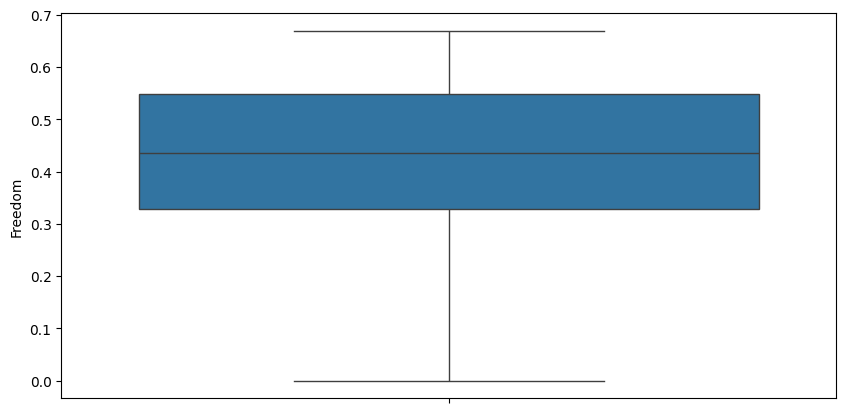

In [655]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Freedom",
    #hue="Category"
)


box plot above shows no outlier in Freedom

<Axes: ylabel='Trust (Government Corruption)'>

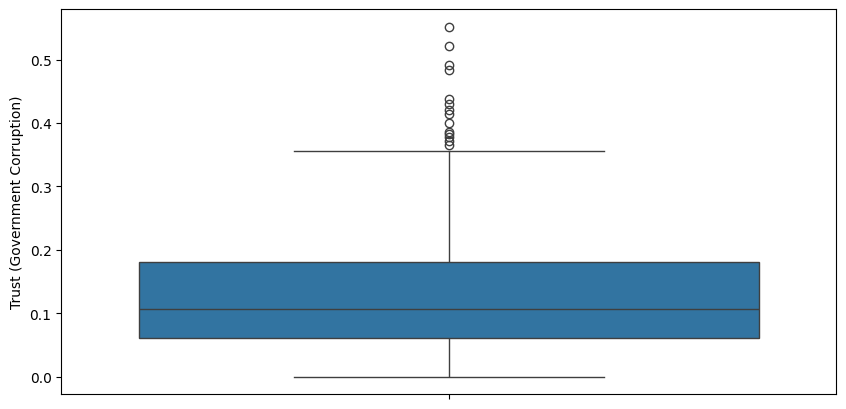

In [656]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Trust (Government Corruption)",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column also there's negative skewness

<Axes: ylabel='Generosity'>

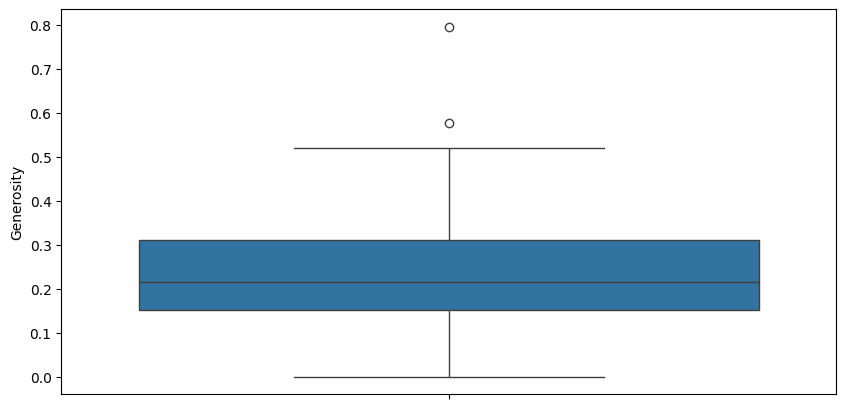

In [657]:
plt.figure(figsize=(10,5))

sns.boxplot(
    df2015,
    y="Generosity",
    #hue="Category"
)

box plot above shows an outlier but I leave it without dropping it because it reflects to a country score in that column also there's negative skewness

# Multivariate Analysis:


Q1:What countries or regions rank the highest in overall happiness and each of
the six factors contributing to happiness?


In [658]:
# first part of question:
print("top 10 highest countries or regions in 2017 on overall happiness")
df2017[df2017['Happiness.Rank']<11][['Happiness.Rank','Country']]

top 10 highest countries or regions in 2017 on overall happiness


,Happiness.Rank,Country
0,1,Norway
1,2,Denmark
2,3,Iceland
3,4,Switzerland
4,5,Finland
5,6,Netherlands
6,7,Canada
7,8,New Zealand
8,9,Sweden
9,10,Australia


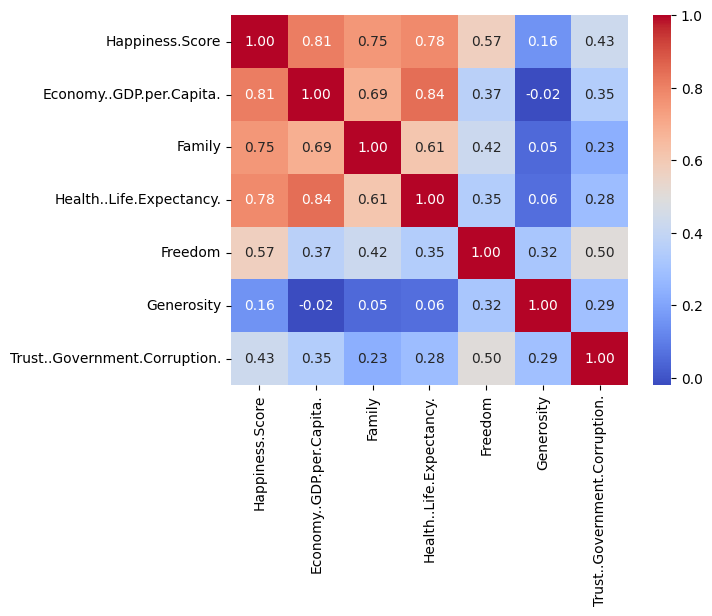

In [659]:
# second part of question:
corr_df = df2017[["Happiness.Score","Economy..GDP.per.Capita.","Family","Health..Life.Expectancy.","Freedom",'Generosity','Trust..Government.Corruption.']].corr()
sns.heatmap(corr_df , annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

 **it shows there are a strong correlation between rank and Economy..GDP.per.Capita,Family,Health..Life.Expectancy and Freedom**

How did country ranks or scores change between the 2015 and 2016 as well as
the 2016 and 2017 reports?


In [660]:
# country rank changes between 2015 and 2016
df2015.rename(columns={'Happiness Rank': 'Happiness Rank2015'}, inplace=True)
df2016.rename(columns={'Happiness Rank': 'Happiness Rank2016'}, inplace=True)
# Merge the DataFrames on the 'Country' column
merged_df = pd.merge(df2015, df2016, on='Country')
# Calculate the change
merged_df['Change_2015_2016'] =merged_df['Happiness Rank2015']- merged_df['Happiness Rank2016']

In [661]:
result_df = merged_df[['Country','Happiness Rank2015','Happiness Rank2016', 'Change_2015_2016']]

In [662]:
# display part of results:
result_df.head(15)


,Country,Happiness Rank2015,Happiness Rank2016,Change_2015_2016
0,Switzerland,1,2,-1
1,Iceland,2,3,-1
2,Denmark,3,1,2
3,Norway,4,4,0
4,Canada,5,6,-1
5,Finland,6,5,1
6,Netherlands,7,7,0
7,Sweden,8,10,-2
8,New Zealand,9,8,1
9,Australia,10,9,1


In [663]:
# country rank changes between 2017 and 2016
df2017.rename(columns={'Happiness.Rank': 'Happiness Rank2017'}, inplace=True)
# Merge the DataFrames
merged_df1617 = pd.merge(df2017, df2016, on='Country')
# Calculate the changes
merged_df1617['Change_2016_2017'] = merged_df1617['Happiness Rank2016'] - merged_df1617['Happiness Rank2017']

In [664]:
result_df1617 = merged_df1617[['Country','Happiness Rank2016','Happiness Rank2017', 'Change_2016_2017']]

In [665]:
# display part of results:
result_df1617.head(15)

,Country,Happiness Rank2016,Happiness Rank2017,Change_2016_2017
0,Norway,4,1,3
1,Denmark,1,2,-1
2,Iceland,3,3,0
3,Switzerland,2,4,-2
4,Finland,5,5,0
5,Netherlands,7,6,1
6,Canada,6,7,-1
7,New Zealand,8,8,0
8,Sweden,10,9,1
9,Australia,9,10,-1


Did any country experience a significant increase or decrease in happiness?


between 2015-2016

assume significant increase above 20 or decrease below -20

In [666]:
result_df[(result_df['Change_2015_2016']>20)|(result_df['Change_2015_2016']<-20)]

,Country,Happiness Rank2015,Happiness Rank2016,Change_2015_2016
21,Venezuela,23,44,-21
66,Algeria,68,38,30
73,Vietnam,75,96,-21
76,Nigeria,78,103,-25
83,Zambia,85,106,-21
87,Latvia,89,68,21
110,Liberia,116,150,-34



between 2016-2017

assume significant increase above 20 or decrease below -20

In [667]:
result_df1617[(result_df1617['Change_2016_2017']>20)|(result_df1617['Change_2016_2017']<-20)]

,Country,Happiness Rank2016,Happiness Rank2017,Change_2016_2017
79,Venezuela,44,82,-38
102,Bulgaria,129,105,24
